<a href="https://colab.research.google.com/github/youngchul-sung/three-minutes-keras/blob/master/ex3_2_dnn_cifar10_cl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing

TensorFlow 2.x selected.


In [0]:
def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)


def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()


def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()

Model: "dnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 100)               307300    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
Hidden-2 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
Total params: 312,860
Trainable params: 312,860
Non-trainable params: 0
_________________________________________________________________
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 2s 55us/sample

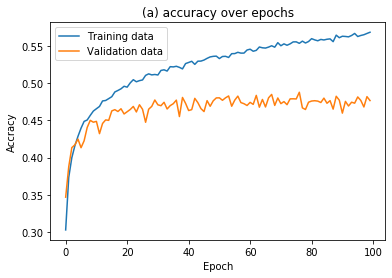

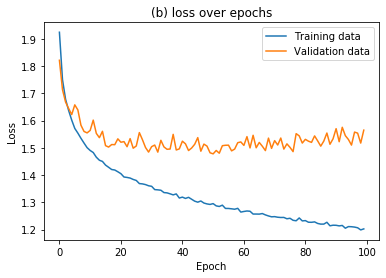

In [3]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()

        self.add(layers.Dense(Nh_l[0], activation='relu',
                              input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(Pd_l[0]))

        self.add(layers.Dense(Nh_l[1], activation='relu',
                              name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))

        self.add(layers.Dense(Nout, activation='softmax'))

        self.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    Y_train = keras.utils.to_categorical(y_train)
    Y_test = keras.utils.to_categorical(y_test)

    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)


# 분류 DNN 학습 및 테스팅 ####################
def main(Pd_l=[0.0, 0.0]):
    Nh_l = [100, 50]
    number_of_class = 10
    Nout = number_of_class

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
    model.summary()
    history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_acc(history, '(a) accuracy over epochs')
    plt.show()
    plot_loss(history, '(b) loss over epochs')
    plt.show()


if __name__ == '__main__':
    main(Pd_l=[0.0, 0.0])